In [38]:
from zipfile import ZipFile
from io import TextIOWrapper
import pandas as pd
import re
import csv
import io

#This turns the file into a pandas df
def zip_csv_iter(name):
    with ZipFile("1014760224_T_ONTIME_REPORTING.zip") as zf:
        with zf.open(name) as f:
            df = pd.read_csv(f)
            return df

def get_data():
    al_codes = {'AA':19805, 'DL':19790, 'WN':19393, 'UA':19977, 'AS':19930, 'B6':20409, 'NK':20416}
    AA = []
    DL = []
    WN = []
    UA = []
    AS = []
    B6 = []
    NK = []

    #iterates through the months 0-11
    for i in range(0,12):
        name = "1014760224_T_ONTIME_REPORTING (" + str(i) + ").csv"
        df = zip_csv_iter(name)

        #iterates through airlines in that month
        for key in al_codes:
            new = df['OP_CARRIER_AIRLINE_ID'].isin([al_codes[key]])
            al_df = df[new]
            total = 0
            for index, row in al_df.iterrows():
                total =+ row['DEP_DELAY'] #+ (row['ARR_DELAY'] - row["DEP_DELAY"])

            #creates final tuple with month number and total delay
            final = (i, total)

            #can't figure out a better way to add to data outside of loop
            if key == 'AA':
                AA.append(final)
            if key == 'DL':
                DL.append(final)
            if key == 'WN':
                WN.append(final)
            if key == 'UA':
                UA.append(final)
            if key == 'AS':
                AS.append(final)
            if key == 'B6':
                B6.append(final)
            if key == 'NK':
                NK.append(final)
                
    return {'AA':AA, 'DL':DL, 'WN':WN, 'UA':UA, 'B6':B6, 'AS':AS, 'NK':NK}

In [39]:
dic = get_data()
print(dic)

{'AA': [(0, -3.0), (1, 0.0), (2, 22.0), (3, -6.0), (4, -2.0), (5, -4.0), (6, 28.0), (7, -5.0), (8, -6.0), (9, 16.0), (10, 98.0), (11, 51.0)], 'DL': [(0, -1.0), (1, -2.0), (2, 1.0), (3, -5.0), (4, -1.0), (5, -1.0), (6, 19.0), (7, -7.0), (8, -8.0), (9, 4.0), (10, -6.0), (11, 11.0)], 'WN': [(0, -3.0), (1, 27.0), (2, 1.0), (3, -1.0), (4, -5.0), (5, 10.0), (6, 63.0), (7, -3.0), (8, -4.0), (9, -6.0), (10, 4.0), (11, -2.0)], 'UA': [(0, nan), (1, -10.0), (2, -7.0), (3, 72.0), (4, -6.0), (5, 59.0), (6, 146.0), (7, -3.0), (8, 21.0), (9, -8.0), (10, -8.0), (11, 5.0)], 'B6': [(0, 67.0), (1, 1.0), (2, 166.0), (3, 5.0), (4, -6.0), (5, 141.0), (6, -7.0), (7, -5.0), (8, -6.0), (9, -8.0), (10, -6.0), (11, 2.0)], 'AS': [(0, -3.0), (1, 61.0), (2, 6.0), (3, 48.0), (4, 11.0), (5, 11.0), (6, -11.0), (7, 39.0), (8, 26.0), (9, 42.0), (10, 11.0), (11, -18.0)], 'NK': [(0, 7.0), (1, -3.0), (2, 12.0), (3, 45.0), (4, 8.0), (5, 0.0), (6, 3.0), (7, 112.0), (8, 23.0), (9, -2.0), (10, -5.0), (11, -6.0)]}


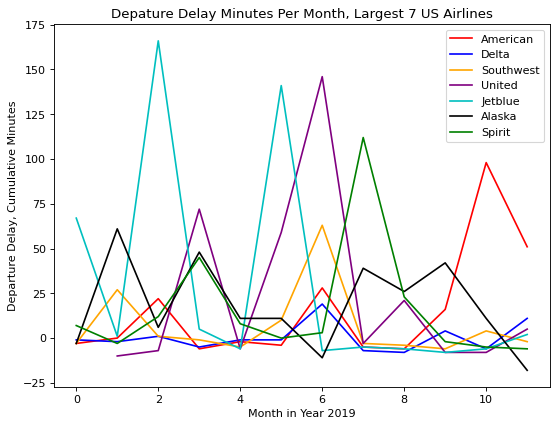

In [76]:
import matplotlib.pyplot as plt

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

def get_y(airline):
    data = dic[airline]
    y = []
    for item in data:
        y.append(item[1])
    return y

plt.title('Depature Delay Minutes Per Month, Largest 7 US Airlines')
plt.ylabel('Departure Delay, Cumulative Minutes')
plt.xlabel('Month in Year 2019')
plt.plot( range(0,12), get_y('AA'), marker='', color='red', linewidth=1.5, label='American')
plt.plot( range(0,12), get_y('DL'), marker='', color='blue', linewidth=1.5, label='Delta')
plt.plot( range(0,12), get_y('WN'), marker='', color='orange', linewidth=1.5, label="Southwest")
plt.plot( range(0,12), get_y('UA'), marker='', color="purple", linewidth=1.5, label="United")
plt.plot( range(0,12), get_y('B6'), marker='', color='c', linewidth=1.5, label="Jetblue")
plt.plot( range(0,12), get_y('AS'), marker='', color='k', linewidth=1.5, label="Alaska")
plt.plot( range(0,12), get_y('NK'), marker='', color='green', linewidth=1.5, label="Spirit")
#plt.plot( range(0,12), 0, marker='', color='black', linestyle='dashed' linewidth=1)
plt.legend()

# Restart

In [4]:
from zipfile import ZipFile
from io import TextIOWrapper
import pandas as pd
import re
import csv
from io import BytesIO

def zip_csv_iter(name):
    with ZipFile("On_Time_Reporting_Carrier_On_Time_Performance.zip") as zf:
        with zf.open(name) as f:
            reader = csv.reader(TextIOWrapper(f))
            for row in reader:
                yield row

In [5]:
years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
months = [*range(1,13)]
al_codes = {'AA':19805, 'DL':19790, 'WN':19393, 'UA':19977, 'AS':19930, 'B6':20409, 'NK':20416}

In [172]:
delay_by_year = pd.DataFrame(columns=['percentage', 'AA', 'DL', 'WN', 'UA', 'AS', 'B6', 'NK', 'O'])
for year in years:
    year_total = 0
    year_delayed = 0
    delays_by_al = {'AA':0, 'DL':0, 'WN':0, 'UA':0, 'AS':0, 'B6':0, 'NK':0, 'O':0}
    for month in months:
        reader = zip_csv_iter('On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_'+year+'_'+str(month)+'.csv')
        header = next(reader)
        delay = header.index("DepDel15")
        al = header.index('Reporting_Airline')
        month_delayed = 0
        month_total = 0
        for row in reader:
            month_total += 1
            if row[delay] is not 'NaN' and row[delay]=='1.00':
                month_delayed += 1
                if row[al] in list(delays_by_al.keys()):
                    delays_by_al[row[al]] += 1
                else:
                    delays_by_al['O'] += 1
        year_total += month_total
        year_delayed += month_delayed
    percentage_delayed = [float((year_delayed/year_total)*100)]
    for i in list(delays_by_al.values()):
        percentage_delayed.append(float((i/year_total)*100))
    delay_by_year = delay_by_year.append(pd.Series(percentage_delayed, name=year, index=delay_by_year.columns), ignore_index=False)
    print('Done '+year)
    
delay_by_year.to_csv (r'delay_by_year(Airlines).csv', index = True, header=True)

Done 2010
Done 2011
Done 2012
Done 2013
Done 2014
Done 2015
Done 2016
Done 2017
Done 2018
Done 2019


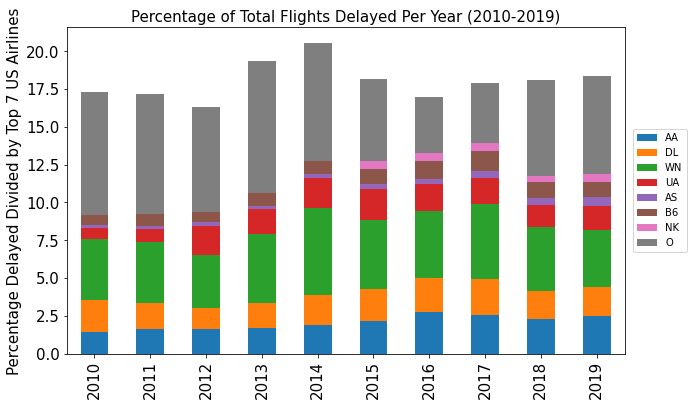

In [173]:
import matplotlib.pyplot as plt
bar = delay_by_year[['AA', 'DL', 'WN', 'UA', 'AS', 'B6', 'NK', 'O']].plot(kind='bar', stacked=True, figsize=(10,6), fontsize=15)
bar.set_ylabel('Percentage Delayed Divided by Top 7 US Airlines', fontsize=15)
bar.set_title('Percentage of Total Flights Delayed Per Year (2010-2019)', fontsize=15)
bar.legend(bbox_to_anchor=(1.12, 0.5), loc=7)
fig = bar.get_figure()
fig.savefig('Percentage Total Flights Delayed')
ax.get_figure().savefig("Total_Flights_Delayed.svg", bbox_inches="tight")

In [35]:
import pandas as pd
import geopandas as gpd
import geojsonio
import os
from shapely.geometry import Point, Polygon
%matplotlib inline

years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
months = [*range(1,13)]

states = gpd.read_file("states_21basic/states.shp")
#list(states['STATE_ABBR'])

In [67]:
delay_by_year = pd.DataFrame(columns=list(states['STATE_ABBR']))

for year in years:
    delays_by_state = {}
    for i in list(states['STATE_ABBR']):
        delays_by_state[i] = [0, 0]
    for month in months:
        reader = zip_csv_iter('On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_'+year+'_'+str(month)+'.csv')
        header = next(reader)
        delay = header.index("DepDel15")
        state = header.index('OriginState')
        for row in reader:
            if row[state] in list(delays_by_state.keys()):
                if row[delay] is not 'NaN' and row[delay]=='1.00':
                    delays_by_state[row[state]] = [delays_by_state[row[state]][0]+1, delays_by_state[row[state]][1]+1]
                else:
                    delays_by_state[row[state]] = [delays_by_state[row[state]][0], delays_by_state[row[state]][1]+1]
                
    for i in list(delays_by_state.keys()):
        if delays_by_state[i][1] != 0:
            delays_by_state[i] = (delays_by_state[i][0]/delays_by_state[i][1])*100
        else:
            delays_by_state[i] = 'NaN'
    delay_by_year = delay_by_year.append(pd.Series(list(delays_by_state.values()), name=year, index=delay_by_year.columns), ignore_index=False)
    print('Done '+year)

            HI         WA       MT         ME         ND         SD  \
2010  7.034994  11.538495  9.46286  15.115583  12.987952  15.154243   

             WY         WI         ID         VT  ...         NM         AL  \
2010  12.415112  16.213606  11.431099  19.115656  ...  16.453147  15.195624   

             MS         GA         SC         AR         LA         FL  \
2010  15.917768  18.920182  16.641444  15.700331  14.852349  17.966156   

             MI         AK  
2010  18.757546  12.481354  

[1 rows x 51 columns]
Done 2010
            HI         WA        MT         ME         ND         SD  \
2010  7.034994  11.538495  9.462860  15.115583  12.987952  15.154243   
2011  7.392511  11.282498  8.628228  14.800190  13.503558  14.791380   

             WY         WI         ID         VT  ...         NM         AL  \
2010  12.415112  16.213606  11.431099  19.115656  ...  16.453147  15.195624   
2011  11.671036  15.407357  10.451550  18.120482  ...  16.309410  14.825086   

   

            HI         WA         MT         ME         ND         SD  \
2010  7.034994  11.538495   9.462860  15.115583  12.987952  15.154243   
2011  7.392511  11.282498   8.628228  14.800190  13.503558  14.791380   
2012  8.177524  11.990911   8.005961  16.039134  11.665903  12.613369   
2013  9.527772  13.598040   9.931727  18.035097  15.077663  16.329373   
2014  7.321900  14.831267  10.322019  16.666667  16.249754  18.592657   
2015  9.206637  14.776920   8.894261  15.402630  12.633904  14.891706   
2016  8.309609  13.780842   8.754307  15.792491  10.832025  11.783879   
2017  9.400460  15.767857   9.982788  20.191458  11.294590  12.049928   

             WY         WI         ID         VT  ...         NM         AL  \
2010  12.415112  16.213606  11.431099  19.115656  ...  16.453147  15.195624   
2011  11.671036  15.407357  10.451550  18.120482  ...  16.309410  14.825086   
2012   9.974081  13.434105  10.491462  21.182141  ...  14.299187  14.524330   
2013  13.027260  18.079559

In [70]:
delay_by_year.to_csv (r'delay_by_year(States).csv', index = True, header=True)

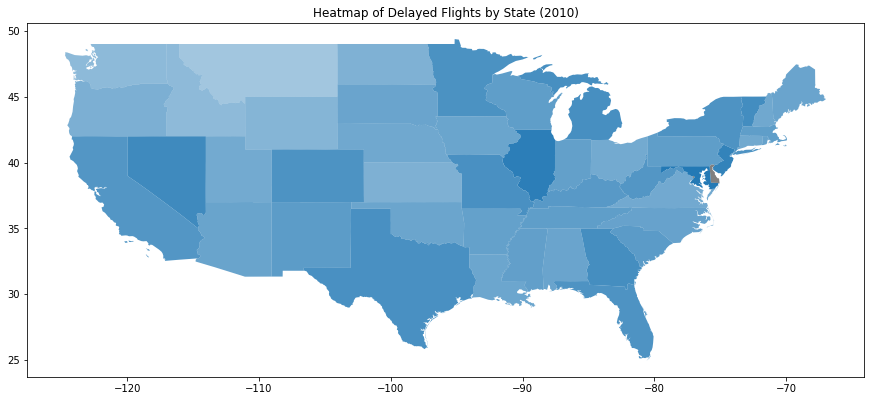

In [145]:
import matplotlib.pyplot as plt
from collections import OrderedDict
cmaps = OrderedDict()

with open('delay_by_year(States).csv') as f:
    df = pd.read_csv(f)
df = df.set_index('Unnamed: 0')

fig, ax = plt.subplots(figsize=(15,15))
#states[states.STATE_ABBR == 'AK'].plot(ax=ax)
#states[states.STATE_ABBR == 'HI'].plot(ax=ax)
for index, row in states.iterrows():
    state = row['STATE_ABBR']
    percentage = delay_by_year[state]['2010']
    if state != 'HI' and state != 'AK':
        if percentage is not 'NaN':
            states[states.STATE_ABBR == row['STATE_ABBR']].plot(ax=ax, alpha=percentage*0.044).set_title('Heatmap of Delayed Flights by State (2010)' )
        else:
            states[states.STATE_ABBR == row['STATE_ABBR']].plot(ax=ax, color='grey')
#     if state == 'HI':
#         states[states.STATE_ABBR == row['STATE_ABBR']].plot(alpha=percentage*0.044, figsize = (10,10))
#     if state == 'AK':
#         states[states.STATE_ABBR == row['STATE_ABBR']].plot(alpha=percentage*0.044, figsize = (10,10))

fig.savefig('Heatmap of States by Delayed Flights')
ax.get_figure().savefig("Heatmap_of_states.svg", bbox_inches="tight")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


No handles with labels found to put in legend.


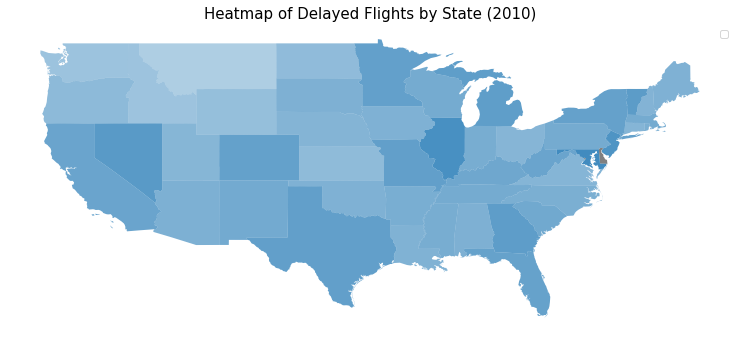

In [169]:
from matplotlib.animation import FuncAnimation
from IPython.core.display import HTML

fig, ax = plt.subplots(figsize=(13,8))
def draw_frame(frame_num):
    ax.cla()
    #states[states.STATE_ABBR == 'AK'].plot(ax=ax)
    #states[states.STATE_ABBR == 'HI'].plot(ax=ax)
    for index, row in states.iterrows():
        state = row['STATE_ABBR']
        percentage = delay_by_year[state][years[frame_num]]
        if state != 'HI' and state != 'AK':
            if percentage is not 'NaN':
                alp = percentage*0.038
                if alp>1:
                    alp=1
                states[states.STATE_ABBR == row['STATE_ABBR']].plot(ax=ax, alpha=alp)
            else:
                states[states.STATE_ABBR == row['STATE_ABBR']].plot(ax=ax, color='grey')
    ax.set_title('Heatmap of Delayed Flights by State ('+ years[frame_num] + ')', fontsize=15)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
    
anim = FuncAnimation(fig, draw_frame, frames=10, interval=3000)
html = anim.to_html5_video()
with open('video.html', 'w') as f:
    f.write(html)
HTML(html)

In [147]:
delay_by_year

,HI,WA,MT,ME,ND,SD,WY,WI,ID,VT,...,NM,AL,MS,GA,SC,AR,LA,FL,MI,AK
2010,7.034994,11.538495,9.462860,15.115583,12.987952,15.154243,12.415112,16.213606,11.431099,19.115656,...,16.453147,15.195624,15.917768,18.920182,16.641444,15.700331,14.852349,17.966156,18.757546,12.481354
2011,7.392511,11.282498,8.628228,14.800190,13.503558,14.791380,11.671036,15.407357,10.451550,18.120482,...,16.309410,14.825086,15.449681,18.398138,16.398684,15.852030,14.978368,17.319314,16.612633,11.255048
2012,8.177524,11.990911,8.005961,16.039134,11.665903,12.613369,9.974081,13.434105,10.491462,21.182141,...,14.299187,14.524330,15.137320,15.564060,15.351532,14.658921,14.747006,15.837474,14.409103,11.498095
2013,9.527772,13.598040,9.931727,18.035097,15.077663,16.329373,13.027260,18.079559,12.729451,20.252714,...,19.536465,17.619008,16.873821,19.954403,18.088973,19.126317,17.819335,19.047383,16.000882,11.647191
2014,7.321900,14.831267,10.322019,16.666667,16.249754,18.592657,13.827299,19.122140,14.134881,19.056694,...,22.148007,18.377870,18.061868,19.473094,19.005554,21.595470,19.271134,20.410614,16.914187,12.428309
2015,9.206637,14.776920,8.894261,15.402630,12.633904,14.891706,12.535743,14.013841,12.754249,16.355983,...,17.439802,15.088983,13.678981,17.192778,16.057198,16.607121,16.223878,19.424912,15.671407,13.069698
2016,8.309609,13.780842,8.754307,15.792491,10.832025,11.783879,11.776263,12.664067,11.836638,17.350470,...,16.304143,13.959047,12.611546,16.111820,15.648617,12.613559,15.340525,18.693033,14.395473,8.142205
2017,9.400460,15.767857,9.982788,20.191458,11.294590,12.049928,13.207047,14.112190,12.410607,21.655467,...,15.979453,13.937626,14.076706,17.668200,15.863632,14.505083,17.613345,19.532491,15.431759,9.234531
2018,8.275060,15.142413,11.921699,17.661921,13.526174,16.826711,13.363382,14.967299,12.224712,17.672458,...,17.089482,16.569171,15.324921,17.818302,15.817884,15.728483,17.807741,19.911882,14.905643,8.805663
2019,9.725950,16.533003,12.822775,18.634414,16.457616,17.208874,16.742962,15.777785,11.872987,19.155339,...,15.765310,16.704708,16.280854,16.696146,16.557245,16.188769,17.913627,19.213228,16.124735,10.223361


In [18]:
#final = pd.DataFrame(columns=['DepDelayMinutes', 'Distance', 'DepTimeBlk', 'Month'])   
app = list()
for month in months:
    reader = zip_csv_iter('On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2019_'+str(month)+'.csv')
    header = next(reader)
    delay = header.index("DepDelayMinutes")
    dist = header.index('Distance')
    hour = header.index('DepTimeBlk')
    mon = header.index('Month')
    for row in reader:
        if row[delay] is not 'Nan' and row[delay] != '0.00':
            try:
                app.append([float(row[delay]),float(row[dist]),float(row[hour][:2]),float(row[mon])])
            except:
                pass
    print('Done '+str(month))
    
final = pd.DataFrame(app, columns=['DepDelayMinutes', 'Distance', 'DepTimeBlk', 'Month'])     
final.to_csv (r'scatter_data.csv', index = True, header=True)

Done 1
Done 2
Done 3
Done 4
Done 5
Done 6
Done 7
Done 8
Done 9
Done 10
Done 11
Done 12


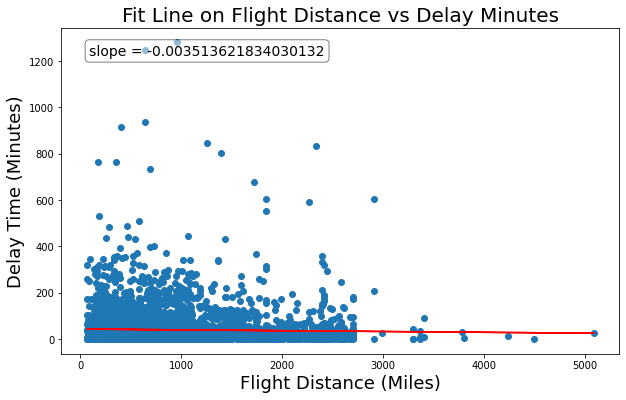

In [19]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split 

# temp_df = final['Month']==1.00
# plot_df = final[temp_df]

X = np.array(final.Distance).reshape(-1, 1) 
y = np.array(final.DepDelayMinutes).reshape(-1, 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test) 

fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(X_test[:5000], y_test[:5000])
ax.plot(X_test[:5000], y_pred[:5000], color='red')
ax.set_title('Fit Line on Flight Distance vs Delay Minutes', fontsize=20)
ax.set_xlabel('Flight Distance (Miles)', fontsize=18)
ax.set_ylabel('Delay Time (Minutes)', fontsize=18)
text = 'slope = ' + str(reg.coef_[0][0])
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.05, 0.95, text, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)

fig.savefig('Fit Line on Flight Distance vs Delay Minutes')
ax.get_figure().savefig("Flight_Distance_vs_Delay_Minutes.svg", bbox_inches="tight")

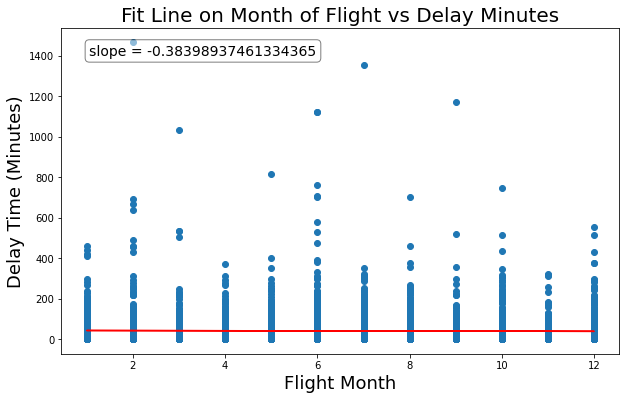

In [20]:
X = np.array(final.Month).reshape(-1, 1) 
y = np.array(final.DepDelayMinutes).reshape(-1, 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test) 

fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(X_test[:5000], y_test[:5000])
ax.plot(X_test[:5000], y_pred[:5000], color='red')
ax.set_title('Fit Line on Month of Flight vs Delay Minutes', fontsize=20)
ax.set_xlabel('Flight Month', fontsize=18)
ax.set_ylabel('Delay Time (Minutes)', fontsize=18)
text = 'slope = ' + str(reg.coef_[0][0])
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.05, 0.95, text, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)

fig.savefig('Fit Line on Month of Flight vs Delay Minutes')
ax.get_figure().savefig("Month_of_Flight_vs_Delay_Minutes.svg", bbox_inches="tight")

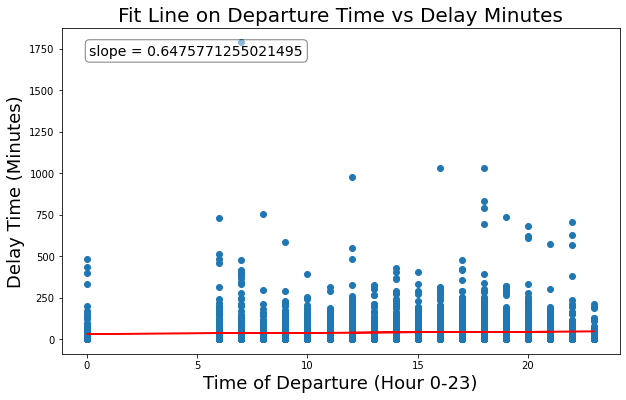

In [21]:
X = np.array(final.DepTimeBlk).reshape(-1, 1) 
y = np.array(final.DepDelayMinutes).reshape(-1, 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test) 

fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(X_test[:5000], y_test[:5000])
ax.plot(X_test[:5000], y_pred[:5000], color='red')
ax.set_title('Fit Line on Departure Time vs Delay Minutes', fontsize=20)
ax.set_xlabel('Time of Departure (Hour 0-23)', fontsize=18)
ax.set_ylabel('Delay Time (Minutes)', fontsize=18)
text = 'slope = ' + str(reg.coef_[0][0])
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.05, 0.95, text, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)

fig.savefig('Fit Line on Departure Time vs Delay Minutes')
ax.get_figure().savefig("Departure_Time_vs_Delay_Minutes.svg", bbox_inches="tight")

In [26]:
test = 'sdfasdfadf'
test[:2]

'sd'

In [39]:
str(reg.coef_[0][0])

'0.650981393300171'

In [8]:
temp_df = final['Month']==1.00
plot_df = final[temp_df]
plot_df

,DepDelayMinutes,Distance,DepTimeBlk,Month
0,8.0,524.0,10.0,1.0
1,5.0,391.0,15.0,1.0
2,23.0,642.0,6.0,1.0
3,4.0,607.0,18.0,1.0
4,3.0,1464.0,8.0,1.0
...,...,...,...,...
185477,4.0,2398.0,22.0,1.0
185478,47.0,216.0,16.0,1.0
185479,3.0,216.0,20.0,1.0
185480,53.0,216.0,14.0,1.0


In [6]:
#final = pd.DataFrame(columns=['DepDelayMinutes', 'Distance', 'DepTimeBlk', 'Month'])   
app = list()
for month in months:
    reader = zip_csv_iter('On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2019_'+str(month)+'.csv')
    header = next(reader)
    carrier = header.index("CarrierDelay")
    nas = header.index('NASDelay')
    late = header.index('LateAircraftDelay')
    security = header.index('SecurityDelay')
    al = header.index('Reporting_Airline')
    for row in reader:
        try:
            app.append([row[al],float(row[carrier]),float(row[nas]),float(row[late]),float(row[security])])
        except:
            pass
    print('Done '+str(month))
    
final = pd.DataFrame(app, columns=['Reporting_Airline', "CarrierDelay", 'NASDelay', 'LateAircraftDelay', 'SecurityDelay'])     
final.to_csv (r'pie_data.csv', index = True, header=True)

Done 1
Done 2
Done 3
Done 4
Done 5
Done 6
Done 7
Done 8
Done 9
Done 10
Done 11
Done 12


In [7]:
AA = {"Carrier":0, "NAS":0, 'Late':0, "Security":0}
DL= {"Carrier":0, "NAS":0, 'Late':0, "Security":0}
WN= {"Carrier":0, "NAS":0, 'Late':0, "Security":0}
UA= {"Carrier":0, "NAS":0, 'Late':0, "Security":0}
AS= {"Carrier":0, "NAS":0, 'Late':0, "Security":0}
B6= {"Carrier":0, "NAS":0, 'Late':0, "Security":0}
NK= {"Carrier":0, "NAS":0, 'Late':0, "Security":0}
O= {"Carrier":0, "NAS":0, 'Late':0, "Security":0}
totals = {"Carrier":0, "NAS":0, 'Late':0, "Security":0}

for index, row in final.iterrows():
    if row[0] == 'AA':
        if row[1] != 0.00:
            AA['Carrier'] += 1
            totals['Carrier'] += 1
        if row[2] != 0.00:
            AA['NAS'] += 1
            totals['NAS'] += 1
        if row[3] != 0.00:
            AA['Late'] += 1
            totals['Late'] += 1
        if row[4] != 0.00:
            AA['Security'] += 1
            totals['Security'] += 1
    if row[0] == 'DL':
        if row[1] != 0.00:
            DL['Carrier'] += 1
            totals['Carrier'] += 1
        if row[2] != 0.00:
            DL['NAS'] += 1
            totals['NAS'] += 1
        if row[3] != 0.00:
            DL['Late'] += 1
            totals['Late'] += 1
        if row[4] != 0.00:
            DL['Security'] += 1
            totals['Security'] += 1
    if row[0] == 'WN':
        if row[1] != 0.00:
            WN['Carrier'] += 1
            totals['Carrier'] += 1
        if row[2] != 0.00:
            WN['NAS'] += 1
            totals['NAS'] += 1
        if row[3] != 0.00:
            WN['Late'] += 1
            totals['Late'] += 1
        if row[4] != 0.00:
            WN['Security'] += 1
            totals['Security'] += 1
    if row[0] == 'UA':
        if row[1] != 0.00:
            UA['Carrier'] += 1
            totals['Carrier'] += 1
        if row[2] != 0.00:
            UA['NAS'] += 1
            totals['NAS'] += 1
        if row[3] != 0.00:
            UA['Late'] += 1
            totals['Late'] += 1
        if row[4] != 0.00:
            UA['Security'] += 1
            totals['Security'] += 1
    if row[0] == 'AS':
        if row[1] != 0.00:
            AS['Carrier'] += 1
            totals['Carrier'] += 1
        if row[2] != 0.00:
            AS['NAS'] += 1
            totals['NAS'] += 1
        if row[3] != 0.00:
            AS['Late'] += 1
            totals['Late'] += 1
        if row[4] != 0.00:
            AS['Security'] += 1
            totals['Security'] += 1
    if row[0] == 'B6':
        if row[1] != 0.00:
            B6['Carrier'] += 1
            totals['Carrier'] += 1
        if row[2] != 0.00:
            B6['NAS'] += 1
            totals['NAS'] += 1
        if row[3] != 0.00:
            B6['Late'] += 1
            totals['Late'] += 1
        if row[4] != 0.00:
            B6['Security'] += 1
            totals['Security'] += 1
    if row[0] == 'NK':
        if row[1] != 0.00:
            NK['Carrier'] += 1
            totals['Carrier'] += 1
        if row[2] != 0.00:
            NK['NAS'] += 1
            totals['NAS'] += 1
        if row[3] != 0.00:
            NK['Late'] += 1
            totals['Late'] += 1
        if row[4] != 0.00:
            NK['Security'] += 1
            totals['Security'] += 1
    else:
        if row[1] != 0.00:
            O['Carrier'] += 1
            totals['Carrier'] += 1
        if row[2] != 0.00:
            O['NAS'] += 1
            totals['NAS'] += 1
        if row[3] != 0.00:
            O['Late'] += 1
            totals['Late'] += 1
        if row[4] != 0.00:
            O['Security'] += 1
            totals['Security'] += 1

In [11]:
for i in list(range(4)):
    AA[list(AA.keys())[i]] = (AA[list(AA.keys())[i]]/totals[list(totals.keys())[i]]) *100
for i in list(range(4)):
    DL[list(DL.keys())[i]] = (DL[list(DL.keys())[i]]/totals[list(totals.keys())[i]]) *100
for i in list(range(4)):
    WN[list(WN.keys())[i]] = (WN[list(WN.keys())[i]]/totals[list(totals.keys())[i]]) *100
for i in list(range(4)):
    UA[list(UA.keys())[i]] = (UA[list(UA.keys())[i]]/totals[list(totals.keys())[i]]) *100
for i in list(range(4)):
    AS[list(AS.keys())[i]] = (AS[list(AS.keys())[i]]/totals[list(totals.keys())[i]]) *100
for i in list(range(4)):
    B6[list(B6.keys())[i]] = (B6[list(B6.keys())[i]]/totals[list(totals.keys())[i]]) *100
for i in list(range(4)):
    NK[list(NK.keys())[i]] = (NK[list(NK.keys())[i]]/totals[list(totals.keys())[i]]) *100
for i in list(range(4)):
    O[list(AA.keys())[i]] = (O[list(O.keys())[i]]/totals[list(totals.keys())[i]]) *100

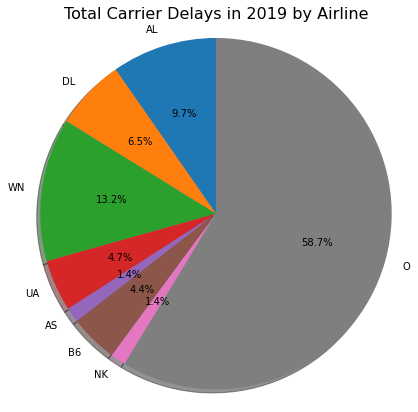

In [18]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'AL', 'DL', 'WN', 'UA', "AS", 'B6', 'NK', 'O'
sizes = [AA['Carrier'], DL['Carrier'], WN['Carrier'], UA['Carrier'], AS['Carrier'], B6['Carrier'], NK['Carrier'], O['Carrier']]

fig, ax = plt.subplots(figsize=(7,7))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Total Carrier Delays in 2019 by Airline', fontsize=16)

fig.savefig('pie1')
ax.get_figure().savefig("pie1.svg", bbox_inches="tight")

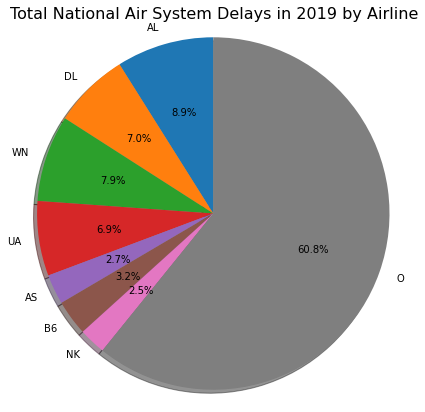

In [19]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'AL', 'DL', 'WN', 'UA', "AS", 'B6', 'NK', 'O'
sizes = [AA['NAS'], DL['NAS'], WN['NAS'], UA['NAS'], AS['NAS'], B6['NAS'], NK['NAS'], O['NAS']]

fig, ax = plt.subplots(figsize=(7,7))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Total National Air System Delays in 2019 by Airline', fontsize=16)

fig.savefig('pie2')
ax.get_figure().savefig("pie2.svg", bbox_inches="tight")

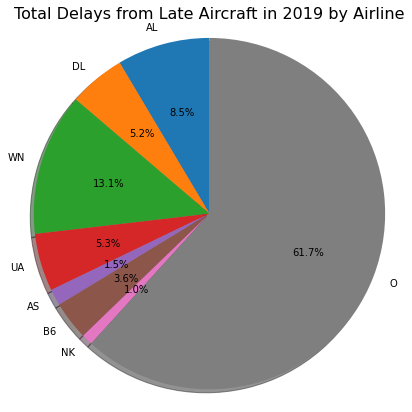

In [22]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'AL', 'DL', 'WN', 'UA', "AS", 'B6', 'NK', 'O'
sizes = [AA['Late'], DL['Late'], WN['Late'], UA['Late'], AS['Late'], B6['Late'], NK['Late'], O['Late']]

fig, ax = plt.subplots(figsize=(7,7))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Total Delays from Late Aircraft in 2019 by Airline', fontsize=16)

fig.savefig('pie4')
ax.get_figure().savefig("pie4.svg", bbox_inches="tight")

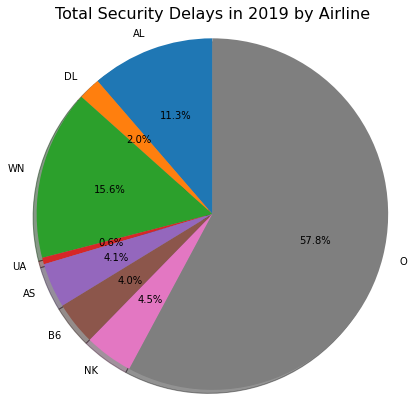

In [21]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'AL', 'DL', 'WN', 'UA', "AS", 'B6', 'NK', 'O'
sizes = [AA['Security'], DL['Security'], WN['Security'], UA['Security'], AS['Security'], B6['Security'], NK['Security'], O['Security']]

fig, ax = plt.subplots(figsize=(7,7))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Total Security Delays in 2019 by Airline', fontsize=16)

fig.savefig('pie3')
ax.get_figure().savefig("pie3.svg", bbox_inches="tight")